In [1]:
import numpy as np
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Convolution2D, Dropout, MaxPool2D, Flatten
from keras.activations import relu, softmax
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard,ModelCheckpoint
import tensorboard

from scipy import misc
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import time

Using TensorFlow backend.


In [2]:
train = True
save = train
load = !train

In [6]:
numberClasses = 5
batchSize = 256
targetSize = 64
dropOut = 0.5

model = Sequential()
model.add(Convolution2D(filters = 64, kernel_size= (3,3), input_shape= (targetSize,targetSize,3),activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Convolution2D(filters =128, kernel_size= (3,3),activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Convolution2D(filters =256, kernel_size= (3,3),activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Convolution2D(filters =256, kernel_size= (3,3),activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dropout(dropOut))

model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(dropOut))

model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(dropOut))

model.add(Dense(units = numberClasses, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 29, 29, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 256)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 256)         590080    
__________

In [8]:
if train:
    train_datagen = ImageDataGenerator(
            rescale=1./255,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip= True,vertical_flip= True)

    test_datagen = ImageDataGenerator(
            rescale=1./255)

    training_set = train_datagen.flow_from_directory(
        'dataset/training_set',
        target_size=(targetSize, targetSize),
        batch_size=batchSize,
        class_mode='categorical')

    test_set = test_datagen.flow_from_directory(
        'dataset/test_set',
        target_size=(targetSize, targetSize),
        batch_size=batchSize,
        class_mode='categorical')

    checkpointer = ModelCheckpoint(filepath='/tmp/weights.hdf5', verbose=1, save_best_only=False)
    tensorboard = TensorBoard(log_dir='./logs', histogram_freq=0,batch_size = batchSize, write_grads=True, write_images=True)

    model.fit_generator(
        training_set,
        max_queue_size=10,
        workers = 10,
        steps_per_epoch=8000/batchSize,
        epochs=25,
        validation_data=test_set,
        validation_steps=2000/batchSize,callbacks=[tensorboard] )

Found 288 images belonging to 5 classes.
Found 91 images belonging to 5 classes.
Epoch 1/25
32/31 [==============================] - 59s - loss: 1.4931 - acc: 0.2791 - val_loss: 1.4709 - val_acc: 0.3187
Epoch 2/25
32/31 [==============================] - 64s - loss: 1.4656 - acc: 0.2901 - val_loss: 1.4364 - val_acc: 0.3736
Epoch 3/25
32/31 [==============================] - 67s - loss: 1.4192 - acc: 0.3470 - val_loss: 1.3820 - val_acc: 0.3736
Epoch 4/25
32/31 [==============================] - 67s - loss: 1.3990 - acc: 0.3285 - val_loss: 1.3830 - val_acc: 0.3626
Epoch 5/25
32/31 [==============================] - 61s - loss: 1.3867 - acc: 0.3498 - val_loss: 1.3781 - val_acc: 0.3736
Epoch 6/25
32/31 [==============================] - 61s - loss: 1.3940 - acc: 0.3246 - val_loss: 1.3990 - val_acc: 0.3626
Epoch 7/25
32/31 [==============================] - 64s - loss: 1.3932 - acc: 0.3536 - val_loss: 1.3472 - val_acc: 0.3846
Epoch 8/25
32/31 [==============================] - 68s - loss: 1

KeyboardInterrupt: 

In [ ]:
if save:
    model.save("./models/{}".format(time.time()))

### Result
32/31 [==============================] - 7s 213ms/step - loss: 0.0850 - acc: 0.9732 - val_loss: 0.0109 - val_acc: 1.0000

## Loading model and testin

In [7]:
if load:
    model = load_model("./models/modelThreeClass.h5")

## Test

In [8]:
def readImages(path,imgRows, imgCols,channels):
    newPath = path # [folder for folder in listdir(path) if not isfile(join(path,folder))]
    
    allImages = []

    images = [f for f in listdir(newPath) if (isfile(join(newPath, f)) and (f[-4:]==".jpg" or f[-4:]==".png"))]

    for img in images:
        tmpPath = join(newPath, img)
        if channels == 1:
            img = misc.imread(tmpPath,'F')
        else: 
            img = misc.imread(tmpPath)
        img = misc.imresize(img, (imgRows,imgCols))
        img = img.astype(np.float32)
        img /= 255.
        img = np.reshape(img, (imgRows, imgCols,channels))
        allImages.append(img)
    return np.array(allImages)

test = readImages("./dataset/test",64,64,3)

In [9]:
xTest = test

## Classifying

In [10]:
%%time
for i in range(10):
    data = model.predict_classes(xTest,batch_size = 1)

 98/113 [=========================>....] - ETA: 0sCPU times: user 11.1 s, sys: 806 ms, total: 11.9 s
Wall time: 3.07 s


In [11]:
print(data)
print (len(data))

[0 1 1 2 1 0 0 2 1 1 1 0 0 0 2 0 0 0 2 2 1 2 1 2 0 2 2 2 0 0 1 2 1 2 2 1 1
 0 0 0 0 0 0 1 0 2 2 0 0 0 0 2 1 1 0 0 2 1 0 0 0 0 0 1 2 0 1 2 0 0 1 1 1 0
 1 0 0 1 0 2 2 2 1 1 0 1 2 1 1 0 0 0 1 1 2 0 0 1 2 1 0 0 1 2 0 0 2 1 1 0 0
 1 0]
113


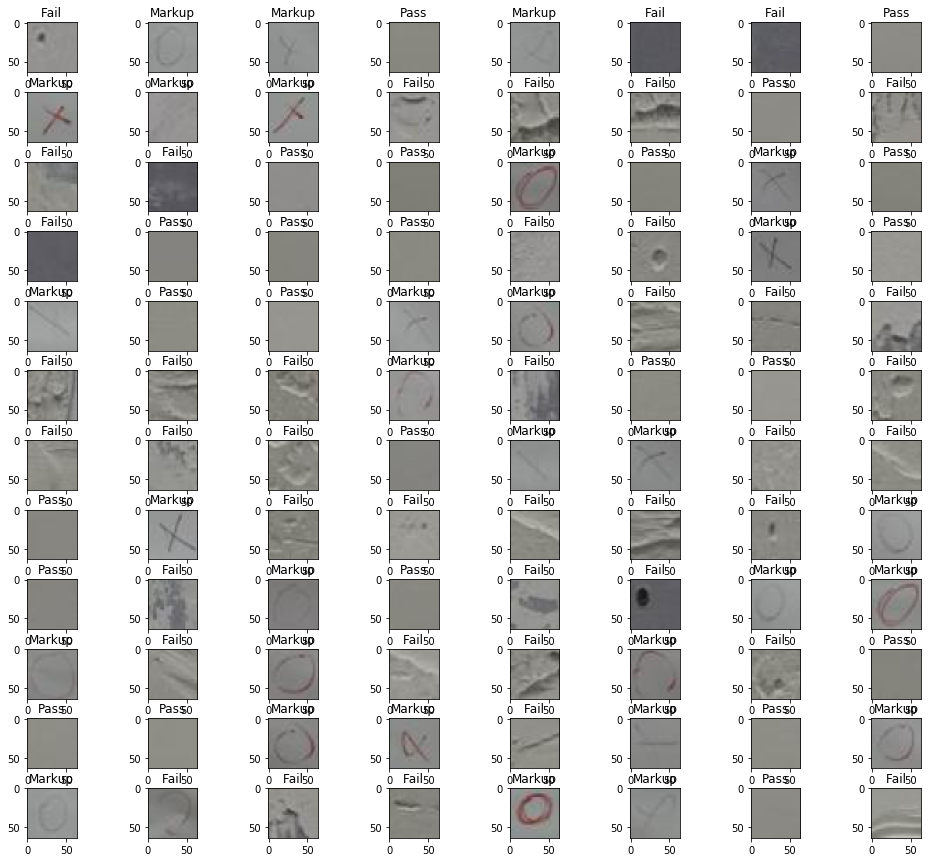

In [12]:
size = 12
sizeV =8
f, axarr = plt.subplots(size, sizeV, figsize=(15,15))
for i in range(size):
    for j in range (sizeV):
        index = i*sizeV+j
        axarr[i,j].imshow((test[index]))
        
        if(data[index]==0):
            label = ("Fail")
        
        elif (data[index] == 1):
            label = ("Markup")
        
        else:
            label = ("Pass")
        axarr[i,j].set_title(label)
    

f.subplots_adjust(left=None, bottom=None, right=1, top=None,
                wspace=.2, hspace=.4)
plt.show()

In [13]:
images = [f for f in listdir("./dataset/test") if (isfile(join("./dataset/test", f)) and (f[-4:]==".jpg" or f[-4:]==".png"))]

labels = [int (name[0]) for name in images]
print (labels)

[1, 3, 3, 4, 3, 0, 0, 4, 3, 1, 3, 2, 2, 2, 4, 2, 2, 0, 4, 4, 3, 4, 3, 4, 0, 4, 4, 4, 1, 1, 3, 4, 3, 4, 4, 3, 3, 2, 2, 0, 2, 2, 2, 3, 0, 4, 4, 1, 2, 2, 2, 4, 3, 3, 2, 2, 4, 3, 1, 1, 2, 2, 1, 3, 4, 0, 3, 4, 0, 1, 3, 3, 3, 2, 3, 2, 2, 3, 1, 4, 4, 4, 3, 3, 2, 3, 4, 3, 3, 3, 2, 1, 3, 3, 4, 2, 2, 3, 4, 3, 2, 2, 3, 4, 0, 2, 4, 3, 3, 0, 2, 3, 2]


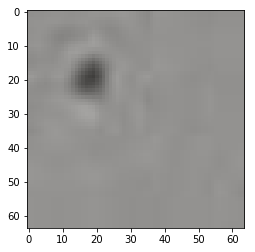

0> Real: 1 | Output: 0


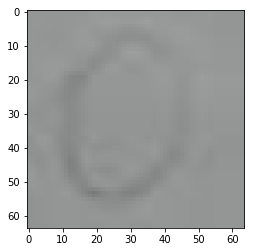

1> Real: 3 | Output: 1


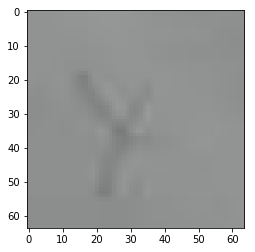

2> Real: 3 | Output: 1


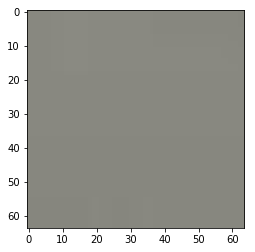

3> Real: 4 | Output: 2


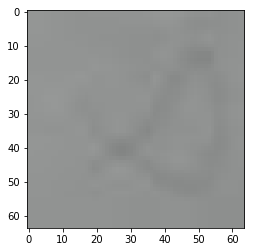

4> Real: 3 | Output: 1


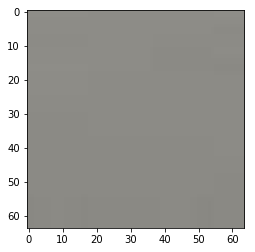

7> Real: 4 | Output: 2


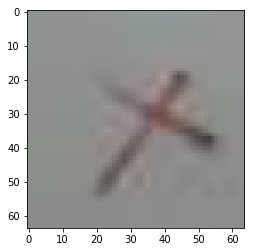

8> Real: 3 | Output: 1


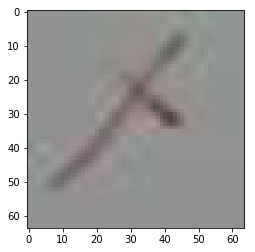

10> Real: 3 | Output: 1


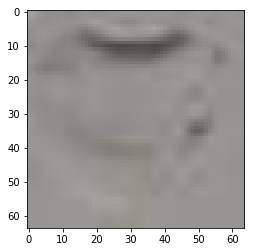

11> Real: 2 | Output: 0


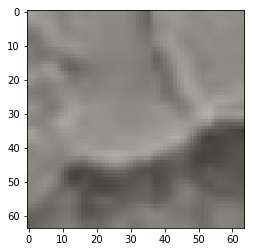

12> Real: 2 | Output: 0


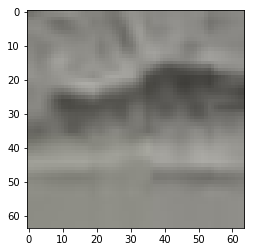

13> Real: 2 | Output: 0


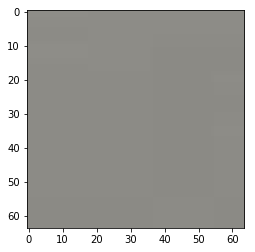

14> Real: 4 | Output: 2


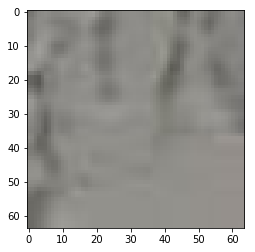

15> Real: 2 | Output: 0


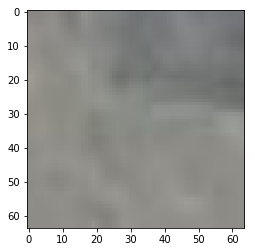

16> Real: 2 | Output: 0


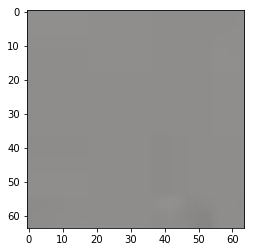

18> Real: 4 | Output: 2


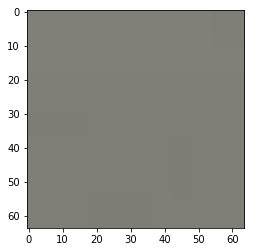

19> Real: 4 | Output: 2


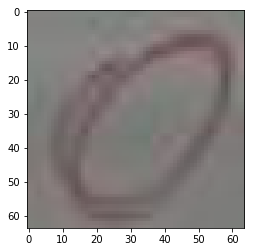

20> Real: 3 | Output: 1


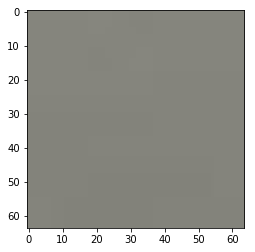

21> Real: 4 | Output: 2


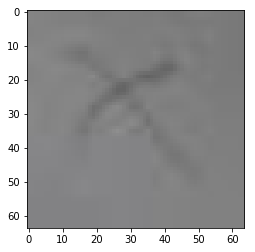

22> Real: 3 | Output: 1


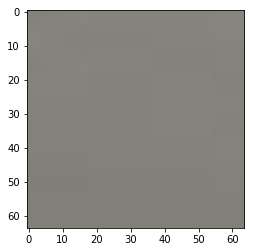

23> Real: 4 | Output: 2


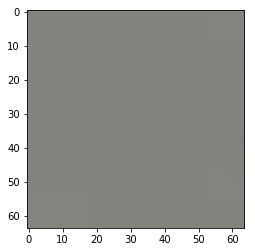

25> Real: 4 | Output: 2


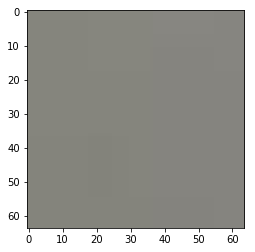

26> Real: 4 | Output: 2


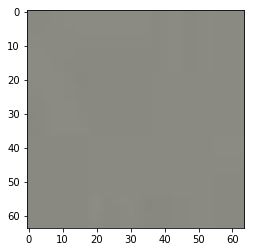

27> Real: 4 | Output: 2


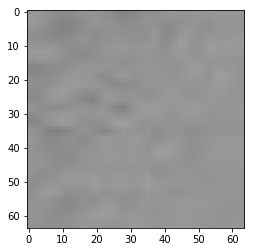

28> Real: 1 | Output: 0


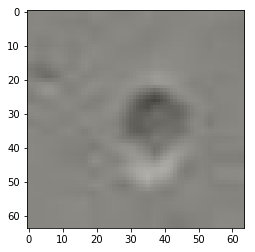

29> Real: 1 | Output: 0


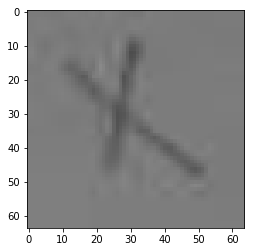

30> Real: 3 | Output: 1


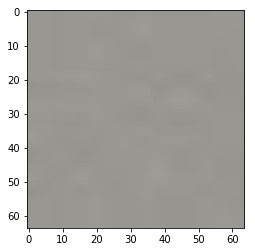

31> Real: 4 | Output: 2


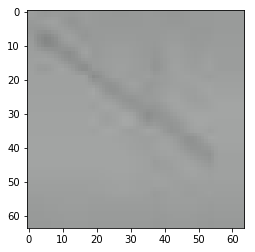

32> Real: 3 | Output: 1


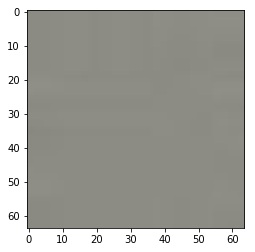

33> Real: 4 | Output: 2


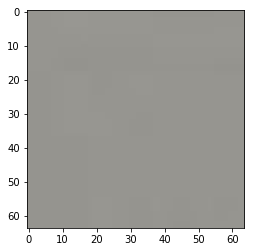

34> Real: 4 | Output: 2


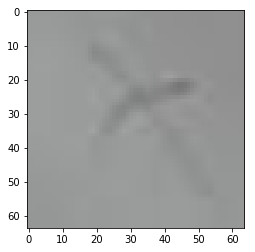

35> Real: 3 | Output: 1


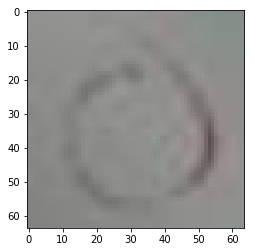

36> Real: 3 | Output: 1


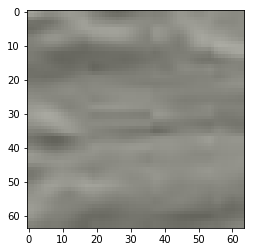

37> Real: 2 | Output: 0


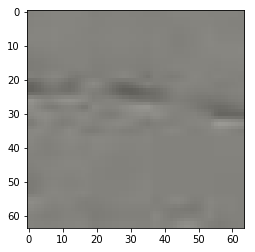

38> Real: 2 | Output: 0


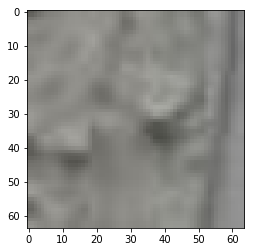

40> Real: 2 | Output: 0


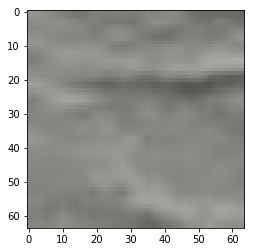

41> Real: 2 | Output: 0


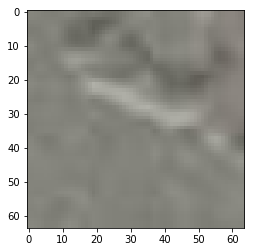

42> Real: 2 | Output: 0


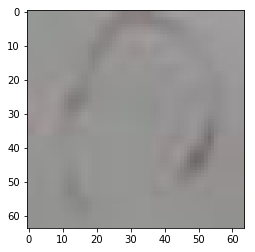

43> Real: 3 | Output: 1


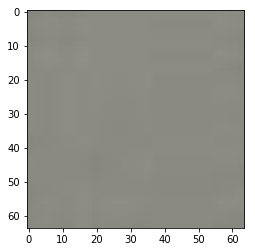

45> Real: 4 | Output: 2


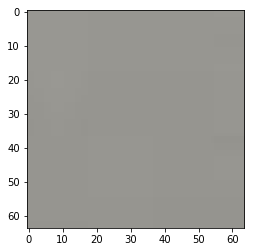

46> Real: 4 | Output: 2


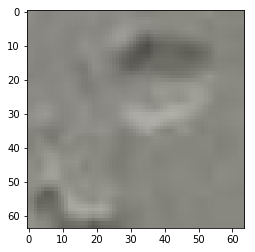

47> Real: 1 | Output: 0


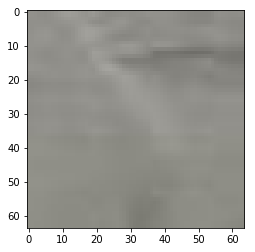

48> Real: 2 | Output: 0


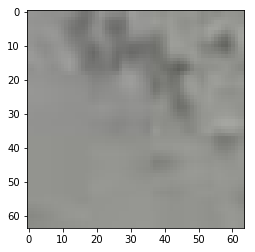

49> Real: 2 | Output: 0


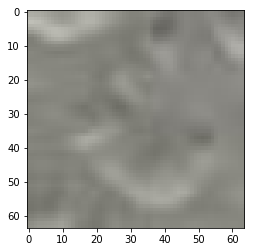

50> Real: 2 | Output: 0


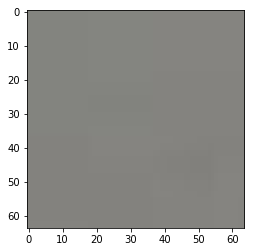

51> Real: 4 | Output: 2


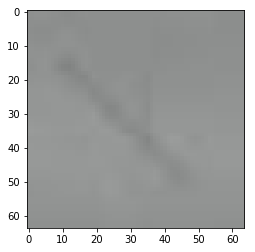

52> Real: 3 | Output: 1


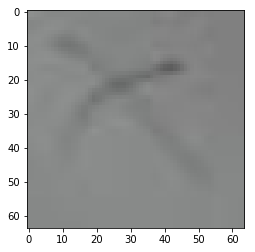

53> Real: 3 | Output: 1


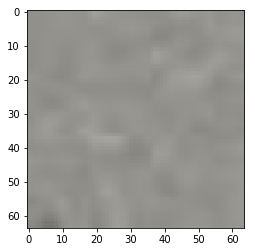

54> Real: 2 | Output: 0


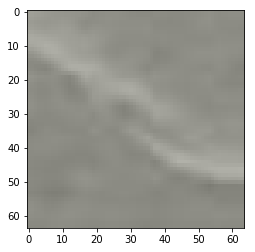

55> Real: 2 | Output: 0


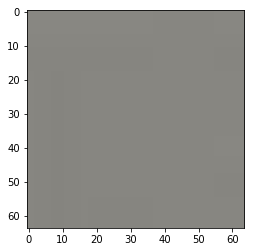

56> Real: 4 | Output: 2


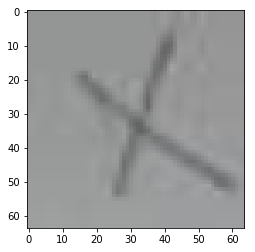

57> Real: 3 | Output: 1


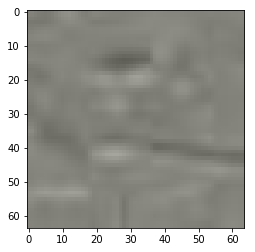

58> Real: 1 | Output: 0


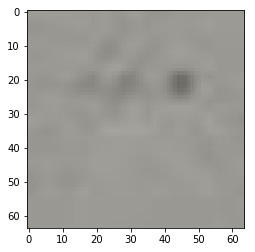

59> Real: 1 | Output: 0


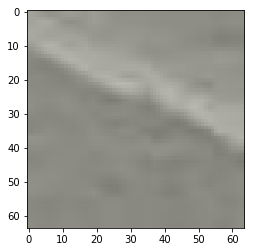

60> Real: 2 | Output: 0


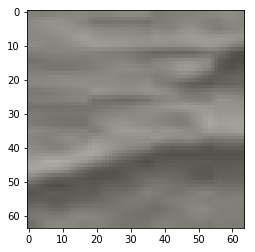

61> Real: 2 | Output: 0


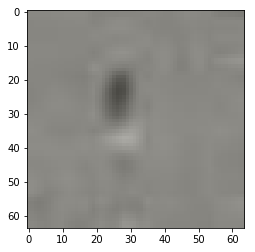

62> Real: 1 | Output: 0


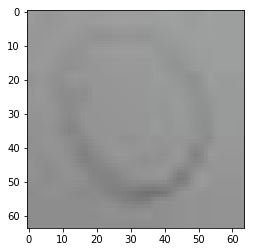

63> Real: 3 | Output: 1


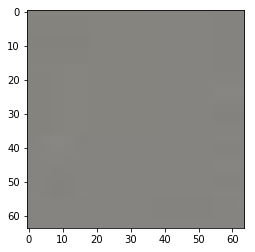

64> Real: 4 | Output: 2


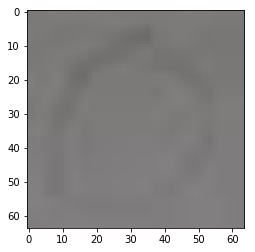

66> Real: 3 | Output: 1


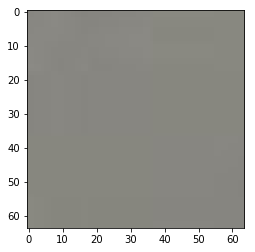

67> Real: 4 | Output: 2


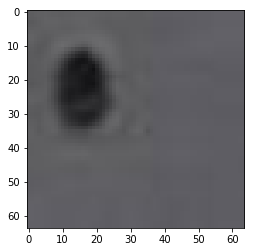

69> Real: 1 | Output: 0


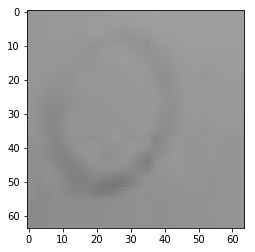

70> Real: 3 | Output: 1


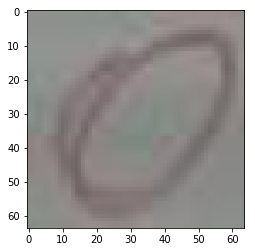

71> Real: 3 | Output: 1


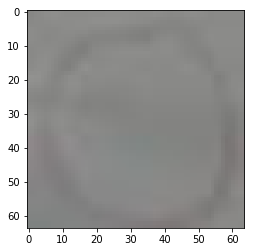

72> Real: 3 | Output: 1


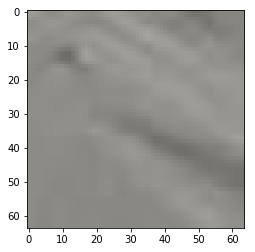

73> Real: 2 | Output: 0


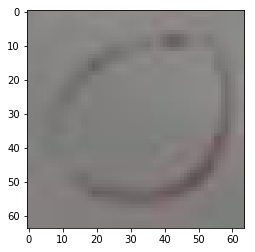

74> Real: 3 | Output: 1


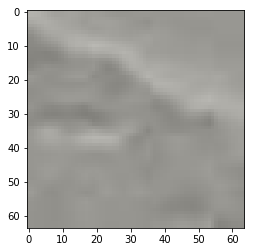

75> Real: 2 | Output: 0


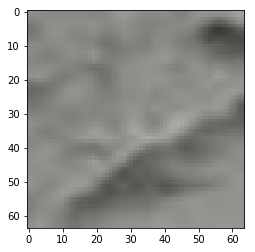

76> Real: 2 | Output: 0


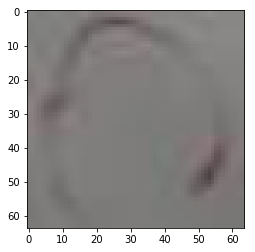

77> Real: 3 | Output: 1


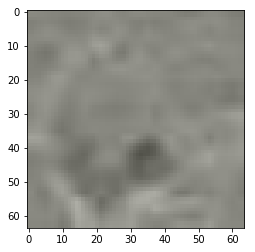

78> Real: 1 | Output: 0


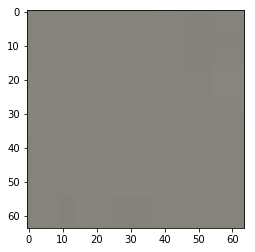

79> Real: 4 | Output: 2


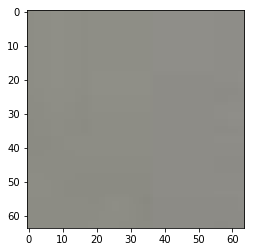

80> Real: 4 | Output: 2


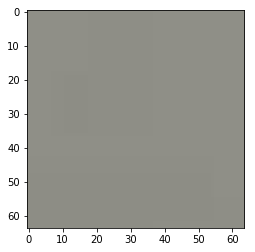

81> Real: 4 | Output: 2


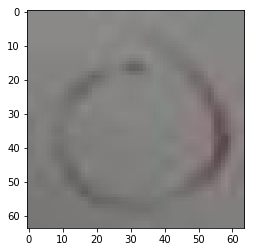

82> Real: 3 | Output: 1


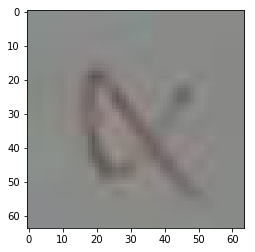

83> Real: 3 | Output: 1


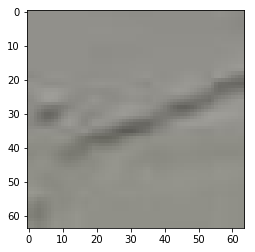

84> Real: 2 | Output: 0


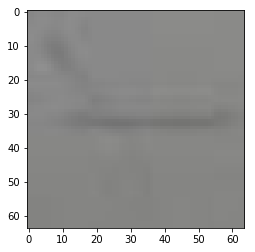

85> Real: 3 | Output: 1


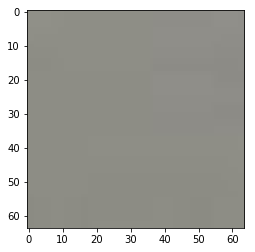

86> Real: 4 | Output: 2


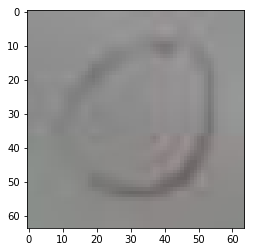

87> Real: 3 | Output: 1


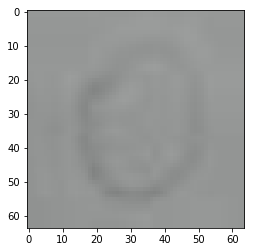

88> Real: 3 | Output: 1


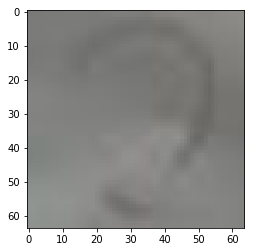

89> Real: 3 | Output: 0


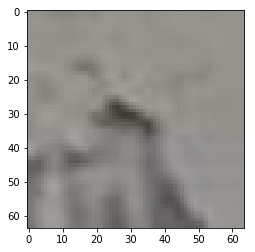

90> Real: 2 | Output: 0


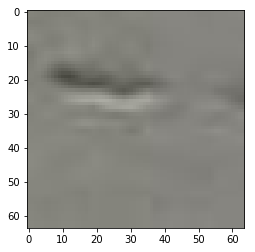

91> Real: 1 | Output: 0


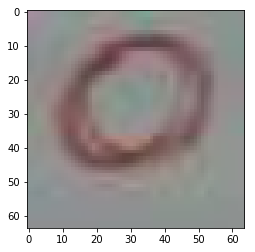

92> Real: 3 | Output: 1


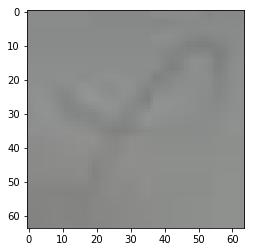

93> Real: 3 | Output: 1


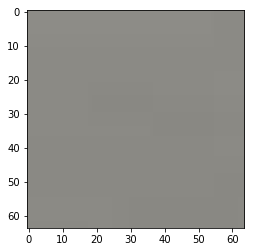

94> Real: 4 | Output: 2


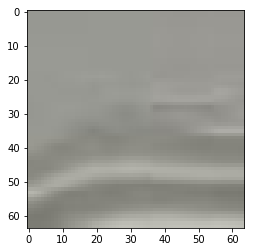

95> Real: 2 | Output: 0


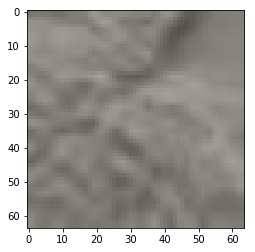

96> Real: 2 | Output: 0


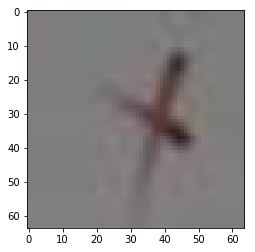

97> Real: 3 | Output: 1


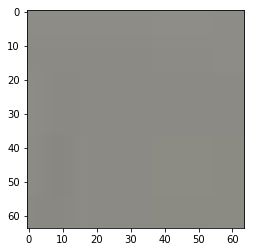

98> Real: 4 | Output: 2


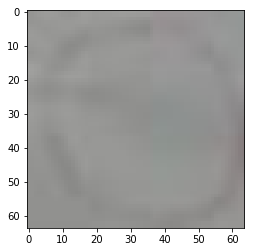

99> Real: 3 | Output: 1


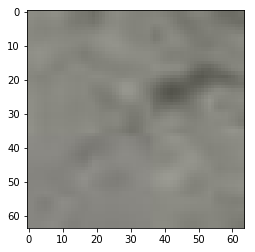

100> Real: 2 | Output: 0


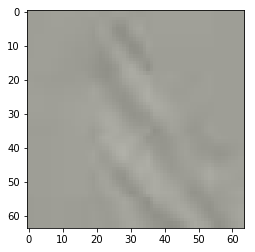

101> Real: 2 | Output: 0


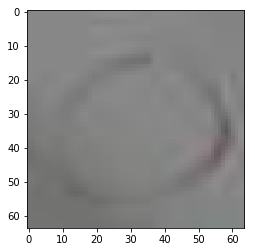

102> Real: 3 | Output: 1


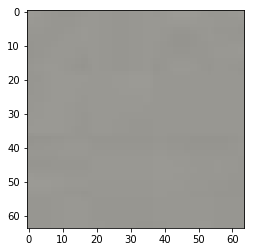

103> Real: 4 | Output: 2


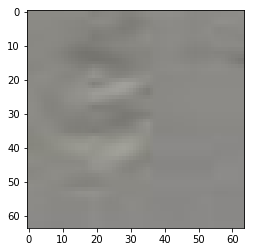

105> Real: 2 | Output: 0


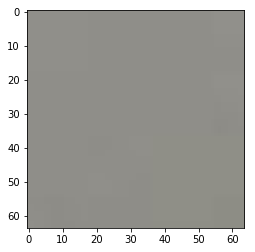

106> Real: 4 | Output: 2


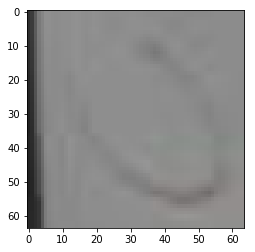

107> Real: 3 | Output: 1


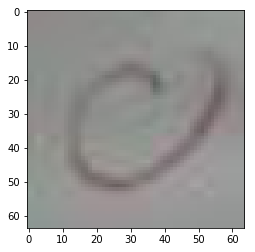

108> Real: 3 | Output: 1


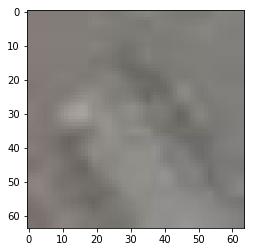

110> Real: 2 | Output: 0


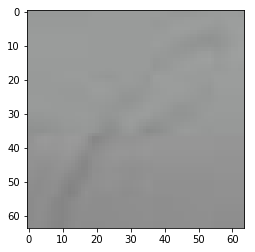

111> Real: 3 | Output: 1


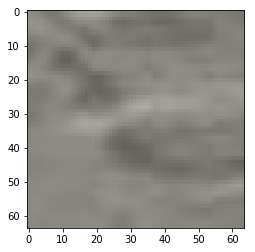

112> Real: 2 | Output: 0


In [14]:
counter = 0
for i in range (len (labels)):
    if labels[i] != data[i]:
        counter += 1
        plt.imshow((test[i]))
        plt.show()
        print ("{}> Real: {} | Output: {}".format (i,labels[i],data[i]))

In [15]:
print (counter, 1-  counter/len(labels))       

102 0.09734513274336287
